In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split

from ast import literal_eval
# is used for safely evaluating strings containing Python literals or container displays
# (e.g., lists, dictionaries) to their corresponding Python objects.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
arxiv_data = pd.read_csv("arxiv_data_210930-054931.csv")

In [ ]:
arxiv_data.head()

,terms,titles,abstracts
0,['cs.LG'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...


In [ ]:
#Data cleaning and preprocessing

In [ ]:

arxiv_data.shape

(56181, 3)

In [ ]:
arxiv_data.isnull().sum()

,0
terms,0
titles,0
abstracts,0


In [ ]:
arxiv_data.duplicated().sum()

np.int64(15054)

In [ ]:
labels_column = arxiv_data['terms'].apply(literal_eval)
labels = labels_column.explode().unique()
print("labels :",labels)
print("lenght :",len(labels))

labels : ['cs.LG' 'cs.AI' 'cs.CR' ... 'D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3'
 '68T07, 68T45, 68T10, 68T50, 68U35' 'I.2.0; G.3']
lenght : 1177


In [ ]:
arxiv_data = arxiv_data[~arxiv_data['titles'].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")
# There are some terms with occurrence as low as 1.
print(sum(arxiv_data['terms'].value_counts()==1))
# how many unique terms
print(arxiv_data['terms'].nunique())

There are 41105 rows in the deduplicated dataset.
2503
3401


In [ ]:
arxiv_data_filtered = arxiv_data.groupby('terms').filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(38602, 3)

In [ ]:
arxiv_data_filtered['terms'] = arxiv_data_filtered['terms'].apply(lambda x: literal_eval(x))
arxiv_data_filtered['terms'].values[:3]

array([list(['cs.LG']), list(['cs.LG', 'cs.AI']),
       list(['cs.LG', 'cs.CR', 'stat.ML'])], dtype=object)

In [ ]:
#Train test and split

In [ ]:
test_split = 0.1

# Initial train and test split.
# The stratify parameter ensures that the splitting is done in a way that preserves the same distribution of labels (terms) in both the training and test sets.
train_df, test_df = train_test_split(arxiv_data_filtered,test_size=test_split,stratify=arxiv_data_filtered["terms"].values,)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 34741
Number of rows in validation set: 1930
Number of rows in test set: 1931


In [ ]:
# creates a TensorFlow RaggedTensor (terms) from the values in the "terms" column of the train_df DataFrame. A RaggedTensor is a tensor with non-uniform shapes
terms = tf.ragged.constant(train_df['terms'].values)
# This line creates a StringLookup layer in TensorFlow. The purpose of this layer is to map strings to integer indices and vice versa. The output_mode="multi_hot" indicates that the layer will output a multi-hot encoded representation of the input strings.
lookup = tf.keras.layers.StringLookup(output_mode='multi_hot')
# This step adapts the StringLookup layer to the unique values in the "terms" column, building the vocabulary.
lookup.adapt(terms)
# retrieve vocabulary
vocab = lookup.get_vocabulary()

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', np.str_('cs.CV'), np.str_('cs.LG'), np.str_('stat.ML'), np.str_('cs.AI'), np.str_('eess.IV'), np.str_('cs.RO'), np.str_('cs.CL'), np.str_('cs.NE'), np.str_('cs.GR'), np.str_('cs.CR'), np.str_('math.OC'), np.str_('eess.SP'), np.str_('cs.SI'), np.str_('cs.MM'), np.str_('cs.SY'), np.str_('cs.IR'), np.str_('eess.SY'), np.str_('cs.MA'), np.str_('cs.HC'), np.str_('math.IT'), np.str_('cs.IT'), np.str_('cs.DC'), np.str_('stat.AP'), np.str_('cs.CY'), np.str_('stat.ME'), np.str_('stat.TH'), np.str_('math.ST'), np.str_('eess.AS'), np.str_('cs.SD'), np.str_('cs.DS'), np.str_('q-bio.QM'), np.str_('q-bio.NC'), np.str_('stat.CO'), np.str_('cs.CG'), np.str_('cs.NI'), np.str_('cs.GT'), np.str_('math.NA'), np.str_('cs.SE'), np.str_('I.2.6'), np.str_('cs.NA'), np.str_('physics.chem-ph'), np.str_('cs.DB'), np.str_('physics.comp-ph'), np.str_('cond-mat.dis-nn'), np.str_('q-bio.BM'), np.str_('math.PR'), np.str_('cs.PL'), np.str_('cs.LO'), np.str_('68T45'), np.str_('cs.AR'), np.str_('p

In [ ]:
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.CV']
Label-binarized representation: [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
max_seqlen = 150
#batch_size: Batch size. It specifies the number of samples to use in each iteration.
batch_size = 128
#padding_token: A token used for padding sequences.
padding_token = "<pad>"
#auto = tf.data.AUTOTUNE: auto is assigned the value tf.data.AUTOTUNE,
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    # creating sequences of labesls
    labels = tf.ragged.constant(dataframe["terms"].values)
    #This line uses the previously defined lookup layer to convert the ragged tensor of labels into a binarized representation. The resulting label_binarized is a NumPy array.
    label_binarized = lookup(labels).numpy()
    # creating sequences of text.
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["abstracts"].values, label_binarized))
    # shuffling data basis on condition
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

"""
In summary, the make_dataset function is designed to create a
dataset suitable for training a model. It takes a dataframe as input,
assumes it has "abstracts" and "terms" columns, and creates a dataset of
batches where each batch consists of abstract
sequences and their corresponding binarized label sequences.
"""

'\nIn summary, the make_dataset function is designed to create a\ndataset suitable for training a model. It takes a dataframe as input,\nassumes it has "abstracts" and "terms" columns, and creates a dataset of\nbatches where each batch consists of abstract\nsequences and their corresponding binarized label sequences.\n'

In [ ]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [ ]:
def invert_multi_hot(encoded_labels, vocab):    # vocab to the arguments
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)

In [ ]:
# This code snippet is iterating through batches of the training dataset and printing the abstract text along with the corresponding labels.
# This code snippet is iterating through batches of the training dataset and printing the abstract text along with the corresponding labels.
text_batch, label_batch = next(iter(train_dataset))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    # Accessing the vocab variable loaded from the lookup layer
    print(f"Label(s): {invert_multi_hot(label[0], vocab)}")    # Pass vocab to invert_multi_hot
    print(" ")

Abstract: b'We propose an efficient transfer learning method for adapting ImageNet\npre-trained Convolutional Neural Network (CNN) to fine-grained image\nclassification task. Conventional transfer learning methods typically face the\ntrade-off between training time and accuracy. By adding "attention module" to\neach convolutional filters of the pre-trained network, we are able to rank and\nadjust the importance of each convolutional signal in an end-to-end pipeline.\nIn this report, we show our method can adapt a pre-trianed ResNet50 for a\nfine-grained transfer learning task within few epochs and achieve accuracy\nabove conventional transfer learning methods and close to models trained from\nscratch. Our model also offer interpretable result because the rank of the\nconvolutional signal shows which convolution channels are utilized and\namplified to achieve better classification result, as well as which signal\nshould be treated as noise for the specific transfer learning task, which 

In [ ]:
vocabulary = set()
train_df["abstracts"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

159122


In [ ]:
#Text Vectorization

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, TextVectorization
from sentence_transformers import SentenceTransformer

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/while_loop.py", line 488, in while_loop
    loop_vars = body(*loop_vars)  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/while_loop.py", line 479, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/map_fn.py", line 495, in compute
    return (i + 1, tas)  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/map_fn.py", line 492, in <listcomp>
    tas = [  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/tf_should_use.py", line 288, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


In [ ]:
text_vectorizer = TextVectorization(
    max_tokens=200000,  # Adjusted to match your notebook
    output_mode='multi_hot'
)
text_vectorizer.adapt(arxiv_data['abstracts'])
np.save('vocab.npy', text_vectorizer.get_vocabulary())  # Save vocabulary

In [ ]:
"""
Mapping Vectorization to Datasets: The code maps the text vectorization operation to
each element of the training, validation, and test datasets. This ensures that the text
data in each dataset is transformed into numerical vectors using the adapted TextVectorization layer.
The num_parallel_calls parameter is used to parallelize the mapping process, and prefetch is
applied to prefetch data batches
for better performance.
"""
train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto).prefetch(auto)

In [ ]:
#model training

model = Sequential([
    Dense(512, activation='relu', input_shape=(200000,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(len(category_names), activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'category_names' is not defined

In [ ]:
# creating shallow_mlp_model  (MLP)
from tensorflow.keras.callbacks import EarlyStopping

# Creating shallow_mlp_model (MLP) with dropout layers
model1 = keras.Sequential([
    # First hidden layer: 512 neurons, ReLU activation function, with dropout.
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Second hidden layer: 256 neurons, ReLU activation function, with dropout.
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),  # Adding dropout for regularization.

    # Output layer: The number of neurons equals the vocabulary size (output vocabulary of the StringLookup layer), with a sigmoid activation function.
    layers.Dense(lookup.vocabulary_size(), activation='sigmoid')
])

# Compile the model
model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['binary_accuracy'])

# Add early stopping
# Number of epochs with no improvement after which training will be stopped.
# Restore weights from the epoch with the best value of the monitored quantity.
early_stopping = EarlyStopping(patience=5,restore_best_weights=True)

# Train the model
# Add early stopping callback.verbose=1
history = model1.fit(train_dataset,validation_data=validation_dataset,epochs=20,callbacks=[early_stopping])

Epoch 1/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 628s 2s/step - binary_accuracy: 0.9461 - loss: 0.1269 - val_binary_accuracy: 0.9943 - val_loss: 0.0194
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 609s 2s/step - binary_accuracy: 0.9946 - loss: 0.0194 - val_binary_accuracy: 0.9945 - val_loss: 0.0185
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 609s 2s/step - binary_accuracy: 0.9957 - loss: 0.0145 - val_binary_accuracy: 0.9945 - val_loss: 0.0187
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 619s 2s/step - binary_accuracy: 0.9964 - loss: 0.0117 - val_binary_accuracy: 0.9944 - val_loss: 0.0192
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - binary_accuracy: 0.9970 - loss: 0.0099 - val_binary_accuracy: 0.9944 - val_loss: 0.0199
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 609s 2s/step - binary_accuracy: 0.9974 - loss: 0.0088 - val_binary_accuracy: 0.9944 - val_loss: 0.0207
Epoch 7/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - binary_accuracy: 0.9977 - loss: 0.0079 - val_binary_accuracy: 0.9944 - val_loss: 0.0209

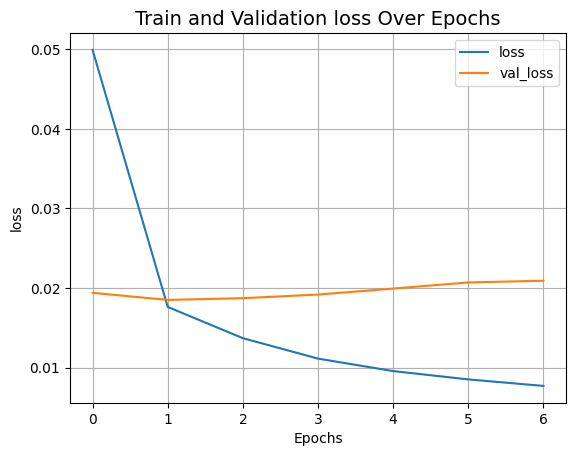

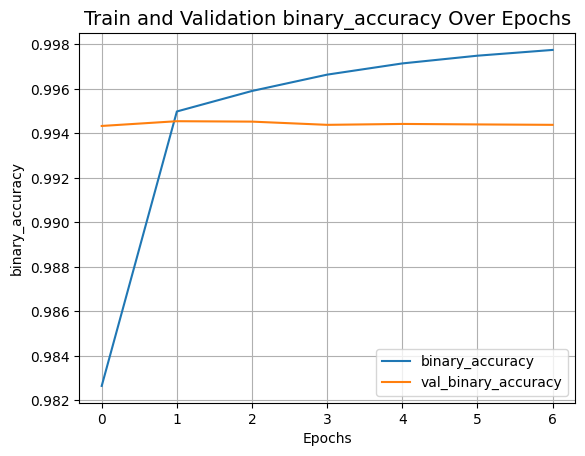

In [ ]:
# plotting loss
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("binary_accuracy")

In [ ]:
#Model Evaluation

In [ ]:
# model evaltuation on test and val dataset
_, binary_acc1 = model1.evaluate(test_dataset)
_, binary_acc2 = model1.evaluate(validation_dataset)

print(f"Categorical accuracy on the test set: {round(binary_acc1 * 100, 2)}%.")
print(f"Categorical accuracy on the validation set: {round(binary_acc2 * 100, 2)}%.")

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 439ms/step - binary_accuracy: 0.9946 - loss: 0.0180
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 527ms/step - binary_accuracy: 0.9946 - loss: 0.0182
Categorical accuracy on the test set: 99.47%.
Categorical accuracy on the validation set: 99.45%.


In [ ]:
#Save Model and Text Vectorizer:

In [ ]:
# Save the model
import pickle

# Save the weights of the model
model1.save("models/model.h5")

# Save the configuration of the text vectorizer
saved_text_vectorizer_config = text_vectorizer.get_config()
with open("models/text_vectorizer_config.pkl", "wb") as f:
    pickle.dump(saved_text_vectorizer_config, f)


with open("models/text_vectorizer_weights.pkl", "wb") as f:
    pickle.dump(text_vectorizer.get_weights(), f)

# Save the vocabulary
with open("models/vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

In [ ]:
#Load Model and Text Vectorizer:

In [ ]:
from tensorflow import keras
import pickle

# Load the model
loaded_model = keras.models.load_model("models/model.h5")

from tensorflow.keras.layers import TextVectorization

# Load the configuration of the text vectorizer
with open("models/text_vectorizer_config.pkl", "rb") as f:
    saved_text_vectorizer_config = pickle.load(f)

# Create a new TextVectorization layer with the saved configuration
loaded_text_vectorizer = TextVectorization.from_config(saved_text_vectorizer_config)

# Load the saved weights into the new TextVectorization layer
with open("models/text_vectorizer_weights.pkl", "rb") as f:
    weights = pickle.load(f)
    loaded_text_vectorizer.set_weights(weights)

In [ ]:
# Load the vocabulary
with open("models/vocab.pkl", "rb") as f:
    loaded_vocab = pickle.load(f)

In [ ]:
#Model Prediction

In [ ]:
def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(loaded_vocab, hot_indices)

In [ ]:
def predict_category(abstract, model, vectorizer, label_lookup):
    # Preprocess the abstract using the loaded text vectorizer
    preprocessed_abstract = vectorizer([abstract])

    # Make predictions using the loaded model
    predictions = model.predict(preprocessed_abstract)

    # Convert predictions to human-readable labels
    predicted_labels = label_lookup(np.round(predictions).astype(int)[0])

    return predicted_labels

In [ ]:
# 1. Install and import
!pip install tensorflow sentence-transformers pandas numpy scikit-learn
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, TextVectorization
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split

# 2. Load and analyze dataset
df = pd.read_csv("/content/arxiv_data_210930-054931.csv")
print("Columns:", df.columns.tolist())
print("Sample categories:", df['terms'].head(3))

# 3. Enhanced preprocessing
def clean_text(text):
    text = str(text).lower()
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Remove short words
    return text

df = df[['abstracts', 'terms']].dropna()
df['abstracts'] = df['abstracts'].apply(clean_text)
df['terms'] = df['terms'].str.split().str[0]  # Primary category

# 4. Prepare categories (with minimum samples threshold)
MIN_SAMPLES_PER_CATEGORY = 50  # Adjust based on your data
category_counts = df['terms'].value_counts()
valid_categories = category_counts[category_counts >= MIN_SAMPLES_PER_CATEGORY].index
df = df[df['terms'].isin(valid_categories)]

categories = pd.get_dummies(df['terms'])
category_names = categories.columns.tolist()
print(f"Working with {len(category_names)} terms")

# 5. Optimized Text Vectorization
MAX_TOKENS = 200000  # Increased for large vocabulary
text_vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS,
    output_mode='multi_hot',  # Changed from 'int' to 'multi_hot'
    ngrams=2,  # Consider bigrams
    standardize='lower_and_strip_punctuation'
)
text_vectorizer.adapt(df['abstracts'])

# Get actual vocabulary size
vocab_size = len(text_vectorizer.get_vocabulary())
print(f"Actual vocabulary size: {vocab_size}")

# 6. Build Model (with dynamic input shape)
model = Sequential([
    Dense(512, activation='relu', input_shape=(vocab_size,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(category_names), activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# 7. Train with validation
X = text_vectorizer(df['abstracts'])
y = categories.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

# 8. Save components
model.save('arxiv_model', save_format='tf')
np.save('category_names.npy', category_names)
np.save('vocab.npy', text_vectorizer.get_vocabulary())

# 9. Prediction function
def predict_category(abstract, model, vectorizer, top_n=3):
    vectorized = vectorizer([abstract])
    predictions = model.predict(vectorized, verbose=0)
    top_indices = np.argsort(predictions[0])[-top_n:][::-1]
    return [(category_names[i], float(predictions[0][i])) for i in top_indices]

# 10. Recommendation system
st_model = SentenceTransformer('all-mpnet-base-v2')  # More powerful model
paper_embeddings = st_model.encode(df['abstracts'].tolist())

def recommend_papers(query, n=5):
    query_embed = st_model.encode([query])
    sim_scores = np.dot(paper_embeddings, query_embed.T).flatten()
    top_indices = np.argsort(sim_scores)[-n:][::-1]
    return df.iloc[top_indices][['title', 'abstracts', 'terms']]

# Example usage
sample_abstract = "Graph neural networks for molecular property prediction..."
print("Predicted categories:", predict_category(sample_abstract, model, text_vectorizer))
print("\nRecommended papers:", recommend_papers(sample_abstract))

Columns: ['terms', 'titles', 'abstracts']
Sample categories: 0                        ['cs.LG']
1               ['cs.LG', 'cs.AI']
2    ['cs.LG', 'cs.CR', 'stat.ML']
Name: terms, dtype: object
Working with 6 terms
Actual vocabulary size: 200000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
